<Body>   
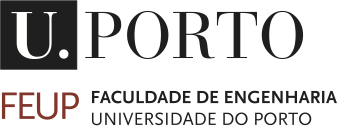   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt), **M. Rosário Pinho** (mrpinho@fe.up.pt)



FEUP, Fev. 2024

---


# **Notebook #07: Adaptive Lyapunov based control**

## **Activity 1**

Consider the following nonlinear system
$$
\dot x = a_1 x + a_2 x^2 + u \tag{1}
$$
where $x\in\mathbf{R}$ is the state and $u\in\mathbf{R}$ is the input and the model parameters $a_1$ and $a_2$ are unknown.



**1.1**
Supposing at this stage that we know $a_1$ and $a_2$, given a desired reference signal $x_d(t)$ and its derivative $\dot x_d(t)$, design a feedback law for (1) such that $x(t)$ converges to $x_d(t)$ as $t\to\infty$.

**1.2**
Confirm the results through simulation by plotting the **time-evolution** of the state $x(t)$, the control signal $u(t)$, and the tracking error $\tilde x(t)$ for the desired reference signal $x_d(t) = \sin(t)$.

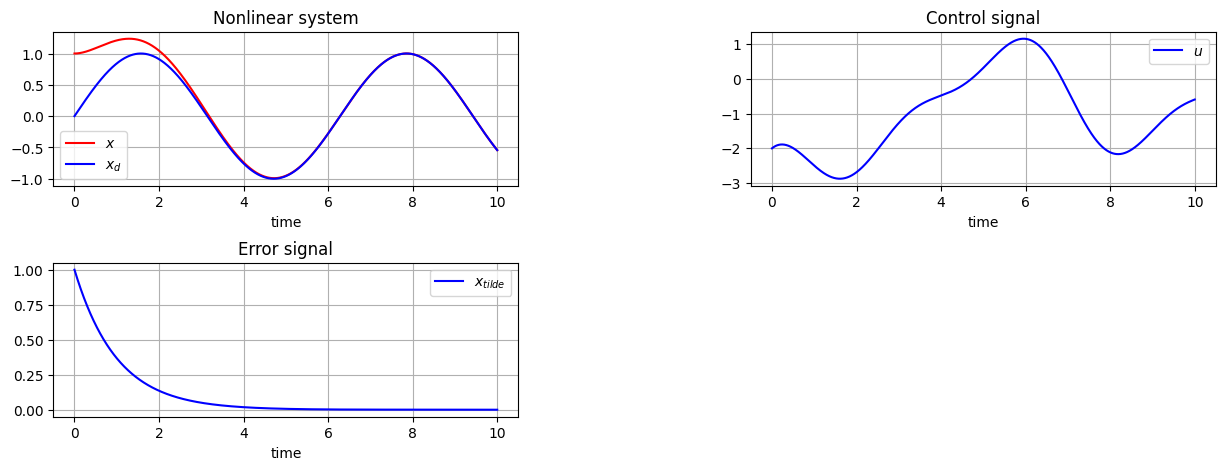

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#System (Euler discretization)
def step_f(x,u,dt):
  a1, a2 = 1, 1
  return x+ (a1*x + a2*x**2 + u)*dt


#Sample-time
dt = 0.001
t_end=10
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal= np.sin(t_signal)
xddot_signal=np.cos(t_signal)

#Initial conditions of our system
x_signal[0] = 1

k=1
hat_a1, hat_a2 = 1.0, 1.0
# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[i] = -hat_a1*x_signal[i]-hat_a2*x_signal[i]**2+xddot_signal[i]-k*(x_signal[i]-xd_signal[i])
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)


ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax2.set_title("Control signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal, x_signal-xd_signal, 'b-', label='$ x_{tilde} $')
ax3.set_title("Error signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

**1.3**
Confirm through simulation that if the model paramenters are not exactly known, then (in general) the state $x(t)$ will not converge to the desired reference signal $x_d(t)$ as $t\to\infty$.

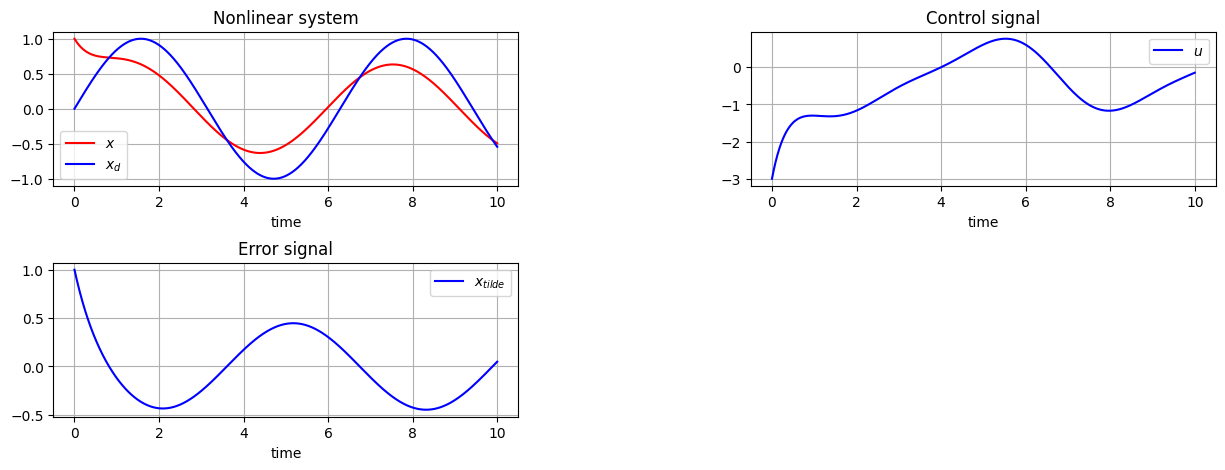

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#System (Euler discretization)
def step_f(x,u,dt):
  a1, a2 = 1, 1
  return x+ (a1*x + a2*x**2 + u)*dt


#Sample-time
dt = 0.001
t_end=10
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal= np.sin(t_signal)
xddot_signal=np.cos(t_signal)

#Initial conditions of our system
x_signal[0] = 1

k=1
hat_a1, hat_a2 = 2.0, 1.0
# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[i] = -hat_a1*x_signal[i]-hat_a2*x_signal[i]**2+xddot_signal[i]-k*(x_signal[i]-xd_signal[i])
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)


ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax2.set_title("Control signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal, x_signal-xd_signal, 'b-', label='$ x_{tilde} $')
ax3.set_title("Error signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

## **Activity 2**

**2.1**
Suppose now that the model parameters are unknown. Design an adaptive feedback law for (1) such that $x(t)$ converges to $x_d(t)$ as $t\to\infty$.

**2.2**
Confirm the results for the desired reference signal $x_d(t) = \sin(t)$ through simulation by plotting the **time-evolution** of the state $x(t)$, the control signal $u(t)$, and the tracking error $\tilde x(t)$.

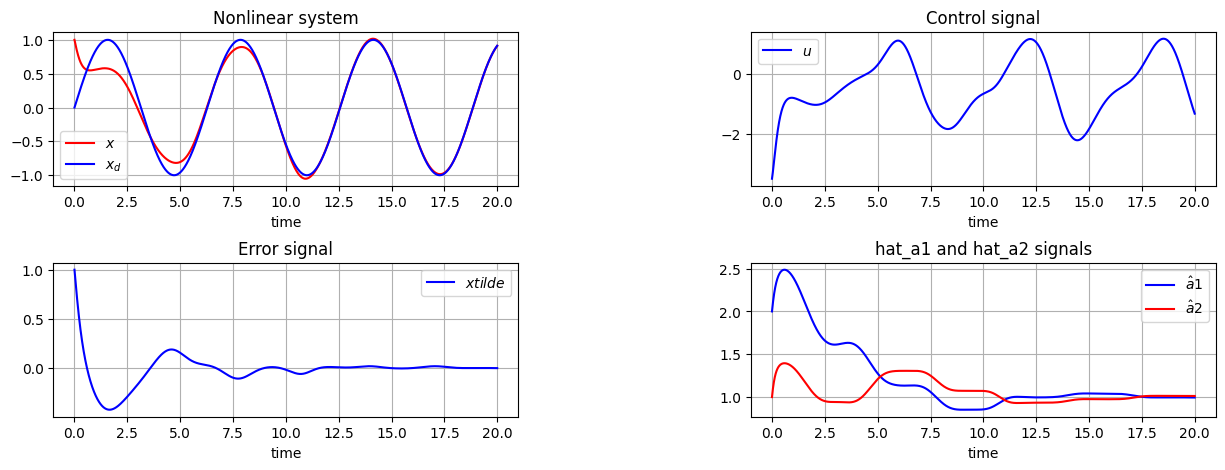

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def step_f(x,u,dt):
  a1, a2 = 1, 1
  return x+ (a1*x + a2*x**2 + u)*dt


#Sample-time
dt = 0.001
t_end=20
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x_signal = np.zeros_like(t_signal)
hat_a1 = np.zeros_like(t_signal)
hat_a2 = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal= np.sin(t_signal)
xddot_signal=np.cos(t_signal)

#Initial conditions of our system
x_signal[0] = 1

k=1.5
hat_a1[0], hat_a2[0] = 2.0, 1
gamma1, gamma2 = 2.5, 2.5
# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[i] = -hat_a1[i]*x_signal[i]-hat_a2[i]*x_signal[i]**2+xddot_signal[i]-k*(x_signal[i]-xd_signal[i])
    hat_a1[i+1] = hat_a1[i] + gamma1*(x_signal[i]-xd_signal[i])*x_signal[i]*dt
    hat_a2[i+1] = hat_a2[i] + gamma2*(x_signal[i]-xd_signal[i])*(x_signal[i]**2)*dt
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax2.set_title("Control signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal, x_signal-xd_signal, 'b-', label='$x tilde$')
ax3.set_title("Error signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

ax4.plot(t_signal, hat_a1, 'b-', label='$\hat a1$')
ax4.plot(t_signal, hat_a2, 'r-', label='$\hat a2$')
ax4.set_title("hat_a1 and hat_a2 signals")
ax4.set_xlabel("time")
ax4.grid()
ax4.legend(loc='best')

**2.3**
Suppose now that system (1) is subject to additive input Gaussian noise (not necessarily with zero mean), that is,
$$
\dot x = a_1 x + a_2 x^2 + u + w \tag{1}
$$
where $w$ is noise. Check through simulation what will be the influence in the control signal $u(t)$.

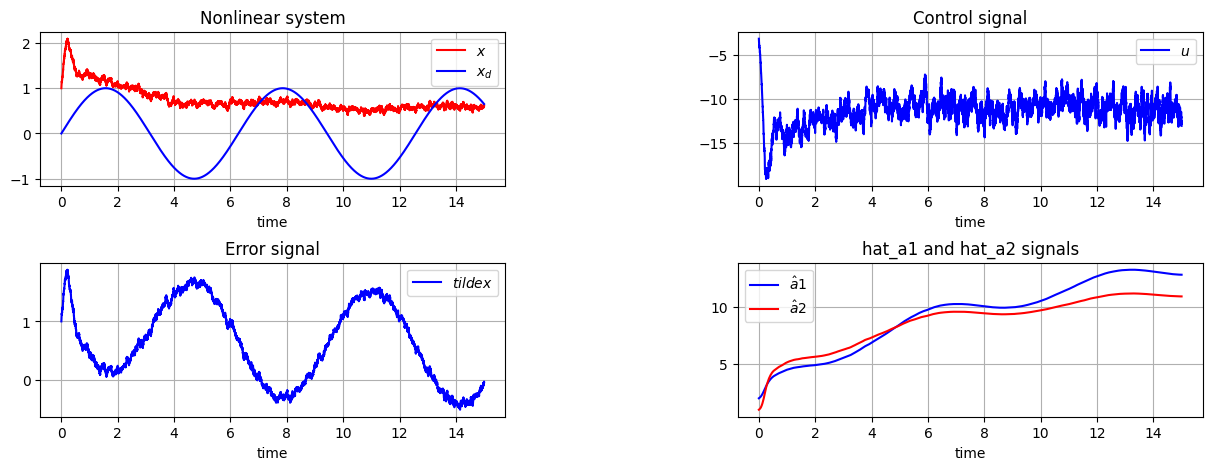

In [16]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

def step_f(x,u,dt):
  a1, a2, a0 = 1, 1, 10 #the noise has nonzero mean
  sigma=0.01
  return x+ (a1*x + a2*x**2 + u)*dt + np.random.normal(a0*dt, sigma)


#Sample-time
dt = 0.001
t_end=15
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x_signal = np.zeros_like(t_signal)
hat_a1 = np.zeros_like(t_signal)
hat_a2 = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal= np.sin(t_signal)
xddot_signal=np.cos(t_signal)

#Initial conditions of our system
x_signal[0] = 1

k=1.2
hat_a1[0], hat_a2[0] = 2.0, 1.0
gamma1, gamma2 = 1.5, 1.5
# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[i] = -hat_a1[i]*x_signal[i]-hat_a2[i]*x_signal[i]**2+xddot_signal[i]-k*(x_signal[i]-xd_signal[i])
    hat_a1[i+1] = hat_a1[i] + gamma1*(x_signal[i]-xd_signal[i])*x_signal[i]*dt
    hat_a2[i+1] = hat_a2[i] + gamma2*(x_signal[i]-xd_signal[i])*(x_signal[i]**2)*dt
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax2.set_title("Control signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal, x_signal-xd_signal, 'b-', label='$tilde x$')
ax3.set_title("Error signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

ax4.plot(t_signal, hat_a1, 'b-', label='$\hat a1$')
ax4.plot(t_signal, hat_a2, 'r-', label='$\hat a2$')
ax4.set_title("hat_a1 and hat_a2 signals")
ax4.set_xlabel("time")
ax4.grid()
ax4.legend(loc='best')

**2.4** Now, include in the desing the term $a_0$ to deal with bias in the noise...

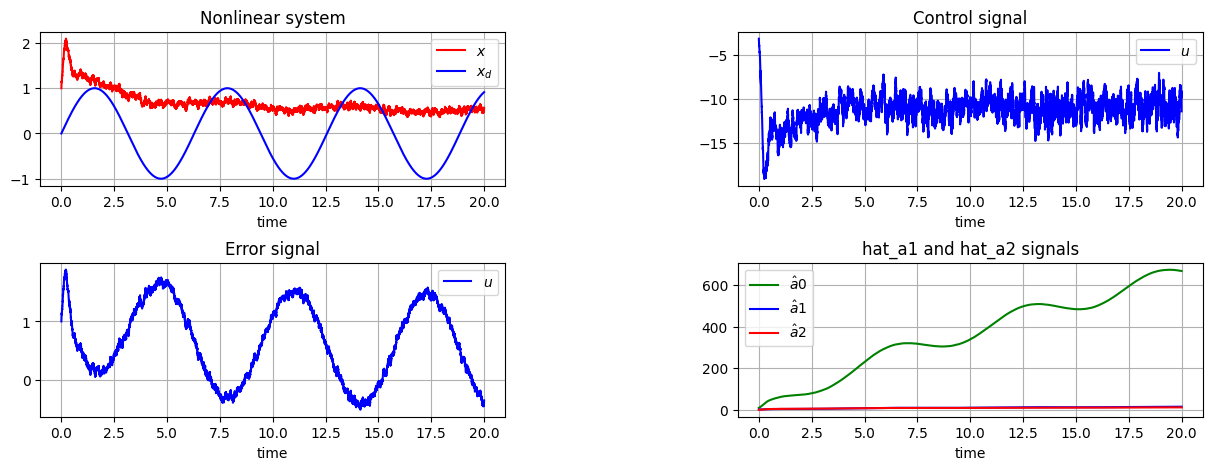

In [17]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

def step_f(x,u,dt):
  a1, a2, a0 = 1, 1, 10 #the noise has nonzero mean
  sigma=0.01
  return x+ (a1*x + a2*x**2 + u)*dt + np.random.normal(a0*dt, sigma)


#Sample-time
dt = 0.001
t_end=20
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x_signal = np.zeros_like(t_signal)
hat_a0 = np.zeros_like(t_signal)
hat_a1 = np.zeros_like(t_signal)
hat_a2 = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal= np.sin(t_signal)
xddot_signal=np.cos(t_signal)

#Initial conditions of our system
x_signal[0] = 1

k=1.2
hat_a1[0], hat_a2[0], hat_a0[0] = 2.0, 1.0, 10
gamma1, gamma2, gamma0 = 1.5, 1.5, 50
# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[i] = -hat_a1[i]*x_signal[i]-hat_a2[i]*x_signal[i]**2+xddot_signal[i]-k*(x_signal[i]-xd_signal[i])
    hat_a0[i+1] = hat_a0[i] + gamma0*(x_signal[i]-xd_signal[i])*dt
    hat_a1[i+1] = hat_a1[i] + gamma1*(x_signal[i]-xd_signal[i])*x_signal[i]*dt
    hat_a2[i+1] = hat_a2[i] + gamma2*(x_signal[i]-xd_signal[i])*(x_signal[i]**2)*dt
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax2.set_title("Control signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal, x_signal-xd_signal, 'b-', label='$u$')
ax3.set_title("Error signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

ax4.plot(t_signal, hat_a0, 'g-', label='$\hat a0$')
ax4.plot(t_signal, hat_a1, 'b-', label='$\hat a1$')
ax4.plot(t_signal, hat_a2, 'r-', label='$\hat a2$')
ax4.set_title("hat_a1 and hat_a2 signals")
ax4.set_xlabel("time")
ax4.grid()
ax4.legend(loc='best')

**2.5**
Using the *leakage approach*, re-design the adaptive control law and display the simulation results.

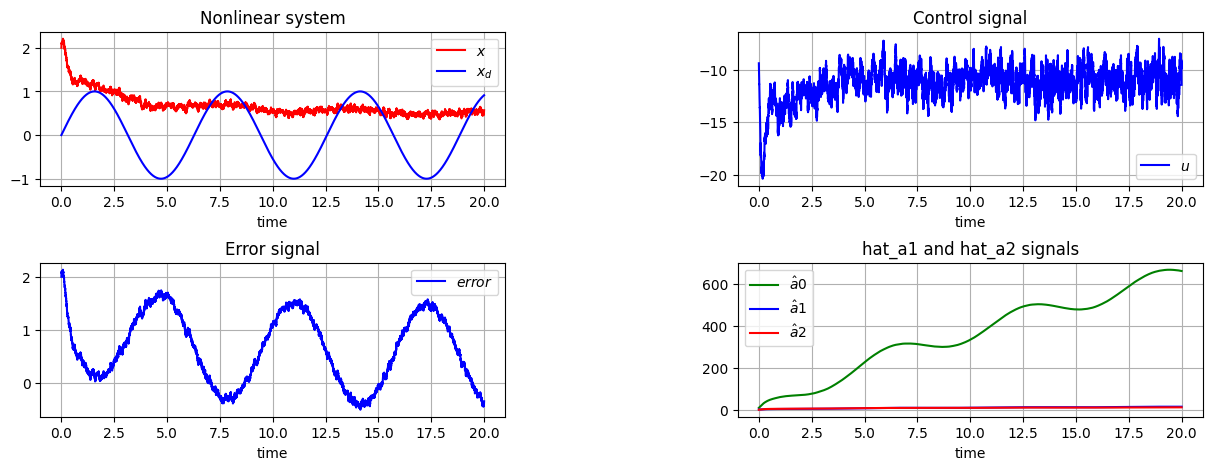

In [18]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

def step_f(x,u,dt):
  a1, a2, a0 = 1, 1, 10
  sigma=0.01
  return x+ (a1*x + a2*x**2 + u)*dt + np.random.normal(a0*dt, sigma)


#Sample-time
dt = 0.001
t_end=20
t = np.linspace(0, t_end,  1000)
# Simulate the system
t_signal = np.arange(0,t_end,dt) # time samples

x_signal = np.zeros_like(t_signal)
hat_a0 = np.zeros_like(t_signal)
hat_a1 = np.zeros_like(t_signal)
hat_a2 = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal= np.sin(t_signal)
xddot_signal=np.cos(t_signal)

#Initial conditions of our system
x_signal[0] = 2

k=1.2
hat_a1[0], hat_a2[0], hat_a0[0] = 2.0, 1.0, 10
gamma1, gamma2, gamma0 = 1.5, 1.5, 50
lambda0, lambda1, lambda2 = 0.1, 0.1, 2.0
# Iteration
for i in range(0,t_signal.shape[0]-1):
    u_signal[i] = -hat_a1[i]*x_signal[i]-hat_a2[i]*x_signal[i]**2+xddot_signal[i]-k*(x_signal[i]-xd_signal[i])
    hat_a0[i+1] = hat_a0[i] + gamma0*(x_signal[i]-xd_signal[i])*dt
    hat_a1[i+1] = hat_a1[i] + gamma1*(x_signal[i]-xd_signal[i])*x_signal[i]*dt
    hat_a2[i+1] = hat_a2[i] + gamma2*(x_signal[i]-xd_signal[i])*(x_signal[i]**2)*dt
    x_signal[i+1] = step_f(x_signal[i],u_signal[i],dt)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax2.set_title("Control signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal, x_signal-xd_signal, 'b-', label='$error$')
ax3.set_title("Error signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

ax4.plot(t_signal, hat_a0, 'g-', label='$\hat a0$')
ax4.plot(t_signal, hat_a1, 'b-', label='$\hat a1$')
ax4.plot(t_signal, hat_a2, 'r-', label='$\hat a2$')
ax4.set_title("hat_a1 and hat_a2 signals")
ax4.set_xlabel("time")
ax4.grid()
ax4.legend(loc='best')